In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
#Preprocessing
import mpu
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from lightgbm.sklearn import LGBMRegressor
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
#Metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Fine Tuning
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline




---





# 1. Load Data

In [2]:
data = pd.read_csv("dataset.csv")

# 2. Take a Quick Look at the Data

In [3]:
data.head()

,ID,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
0,54:00.0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,21:31.0,5.5,2013-09-28 00:21:31+00:00,-74.014165,40.708941,-74.016310,40.716734,1
2,18:00.0,21.5,2013-06-16 03:18:00+00:00,-73.991075,40.760352,-73.941382,40.713292,1
3,43:00.0,9.5,2013-07-20 13:43:00+00:00,-74.002662,40.723630,-73.991722,40.748905,5
4,57:17.0,15.5,2013-11-05 22:57:17+00:00,-73.962397,40.712705,-73.996834,40.680403,2


In [4]:
data.describe()

,travel_fee,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048561e+06,1.048561e+06,1.048575e+06
mean,1.259461e+01,-7.244555e+01,3.975055e+01,-7.240331e+01,3.973114e+01,1.709884e+00
std,1.082356e+01,1.120796e+01,8.654673e+00,1.133808e+01,8.153418e+00,1.375843e+00
min,-5.200000e+01,-7.359955e+02,-3.084296e+03,-7.360500e+02,-7.418635e+01,0.000000e+00
25%,6.500000e+00,-7.399220e+01,4.073444e+01,-7.399146e+01,4.073349e+01,1.000000e+00
50%,9.500000e+00,-7.398187e+01,4.075236e+01,-7.398023e+01,4.075279e+01,1.000000e+00
75%,1.400000e+01,-7.396685e+01,4.076700e+01,-7.396362e+01,4.076782e+01,2.000000e+00
max,4.500000e+02,4.085448e+01,7.398435e+01,4.090787e+01,7.401300e+01,9.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ID              1048575 non-null  object 
 1   travel_fee      1048575 non-null  float64
 2   departure_time  1048575 non-null  object 
 3   departure_long  1048575 non-null  float64
 4   departure_lat   1048575 non-null  float64
 5   arrival_long    1048561 non-null  float64
 6   arrival_lat     1048561 non-null  float64
 7   occupancy       1048575 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 64.0+ MB


In [6]:
missing_count = data.isnull().sum()
missing_percentage = (missing_count / len(data)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_count,
                             'Missing %': missing_percentage})
missing_info

,Missing Count,Missing %
ID,0,0.000000
travel_fee,0,0.000000
departure_time,0,0.000000
departure_long,0,0.000000
departure_lat,0,0.000000
arrival_long,14,0.001335
arrival_lat,14,0.001335
occupancy,0,0.000000


# 3. Split Data into Training and Test Set

In [7]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838860 entries, 408561 to 121958
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              838860 non-null  object 
 1   travel_fee      838860 non-null  float64
 2   departure_time  838860 non-null  object 
 3   departure_long  838860 non-null  float64
 4   departure_lat   838860 non-null  float64
 5   arrival_long    838850 non-null  float64
 6   arrival_lat     838850 non-null  float64
 7   occupancy       838860 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 57.6+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209715 entries, 781974 to 487559
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              209715 non-null  object 
 1   travel_fee      209715 non-null  float64
 2   departure_time  209715 non-null  object 
 3   departure_long  209715 non-null  float64
 4   departure_lat   209715 non-null  float64
 5   arrival_long    209711 non-null  float64
 6   arrival_lat     209711 non-null  float64
 7   occupancy       209715 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 14.4+ MB




---



# 4. Data Understanding and Data Preprocessing

In [10]:
train = train.dropna(axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838850 entries, 408561 to 121958
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              838850 non-null  object 
 1   travel_fee      838850 non-null  float64
 2   departure_time  838850 non-null  object 
 3   departure_long  838850 non-null  float64
 4   departure_lat   838850 non-null  float64
 5   arrival_long    838850 non-null  float64
 6   arrival_lat     838850 non-null  float64
 7   occupancy       838850 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 57.6+ MB


Drop missing value

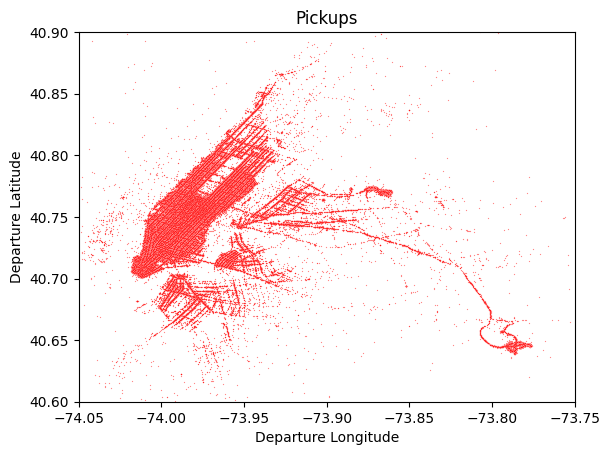

In [11]:
longitude_range = (-74.05, -73.75)
latitude_range = (40.6, 40.90)

sns.scatterplot(x=train["departure_long"], y=train["departure_lat"], alpha=0.5, s=.8, color="red")
plt.title("Pickups")
plt.xlabel("Departure Longitude")
plt.ylabel("Departure Latitude")

plt.ylim(latitude_range)
plt.xlim(longitude_range)

plt.show()

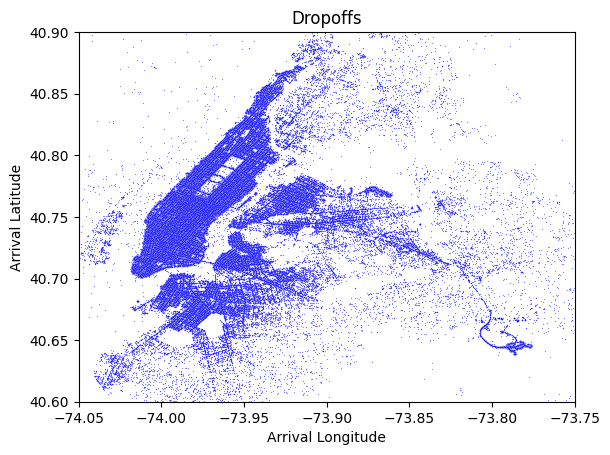

In [12]:
longitude_range = (-74.05, -73.75)
latitude_range = (40.6, 40.90)

sns.scatterplot(x=train["arrival_long"], y=train["arrival_lat"], alpha=0.5, s=.8, color="blue")
plt.title("Dropoffs")
plt.xlabel("Arrival Longitude")
plt.ylabel("Arrival Latitude")

plt.ylim(latitude_range)
plt.xlim(longitude_range)

plt.show()

In [13]:
longitude_range = (-74.05, -73.75)
latitude_range = (40.6, 40.90)

departure_longitude_condition = (train['departure_long'] >= longitude_range[0]) & (train['departure_long'] <= longitude_range[1])
departure_latitude_condition = (train['departure_lat'] >= latitude_range[0]) & (train['departure_lat'] <= latitude_range[1])
train = train[departure_longitude_condition & departure_latitude_condition]
arrival_longitude_condition = (train['arrival_long'] >= longitude_range[0]) & (train['arrival_long'] <= longitude_range[1])
arrival_latitude_condition = (train['arrival_lat'] >= latitude_range[0]) & (train['arrival_lat'] <= latitude_range[1])
train = train[arrival_longitude_condition & arrival_latitude_condition]

Remove outliers by limiting the longitude and latitude after some trial and error on visualizing the data, so that the **'distance'** feature can be calculated

In [14]:
for index, row in train.iterrows():
    departure_coords = (row["departure_lat"], row["departure_long"])
    arrival_coords = (row["arrival_lat"], row["arrival_long"])
    distance = mpu.haversine_distance(departure_coords, arrival_coords)
    train.loc[index, "distance"] = distance

Create 'distance' feature

In [15]:
train['departure_time'] = pd.to_datetime(train['departure_time'])
train['hour'] = train['departure_time'].dt.hour

Create 'hour' feature

In [16]:
train = train[(train['travel_fee'] > 0) & (train['travel_fee'] < 100)]
train = train[(train['occupancy'] > 0) & (train['occupancy'] <= 7)]

Remove outliers from 'travel_fee' and 'occupancy' feature

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818364 entries, 408561 to 121958
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   ID              818364 non-null  object             
 1   travel_fee      818364 non-null  float64            
 2   departure_time  818364 non-null  datetime64[ns, UTC]
 3   departure_long  818364 non-null  float64            
 4   departure_lat   818364 non-null  float64            
 5   arrival_long    818364 non-null  float64            
 6   arrival_lat     818364 non-null  float64            
 7   occupancy       818364 non-null  int64              
 8   distance        818364 non-null  float64            
 9   hour            818364 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(6), int32(1), int64(1), object(1)
memory usage: 65.6+ MB


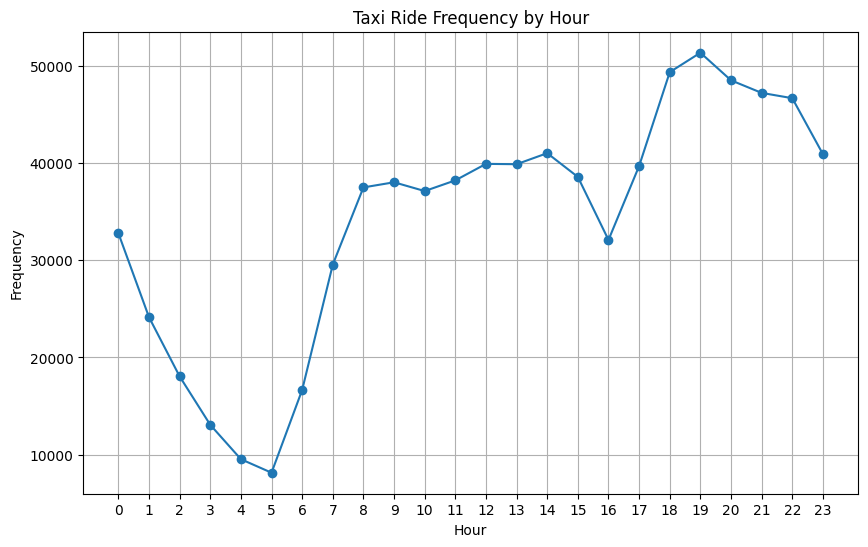

In [18]:
hourly_counts = train['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')

plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Taxi Ride Frequency by Hour')
plt.xticks(range(24))
plt.grid()
# Show the plot
plt.show()

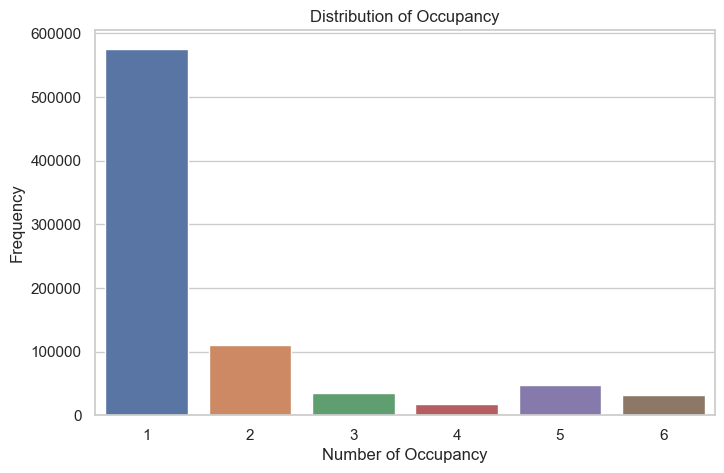

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=train["occupancy"].value_counts().index, y=train["occupancy"].value_counts().values)

plt.xlabel('Number of Occupancy')
plt.ylabel('Frequency')
plt.title('Distribution of Occupancy')

plt.show()

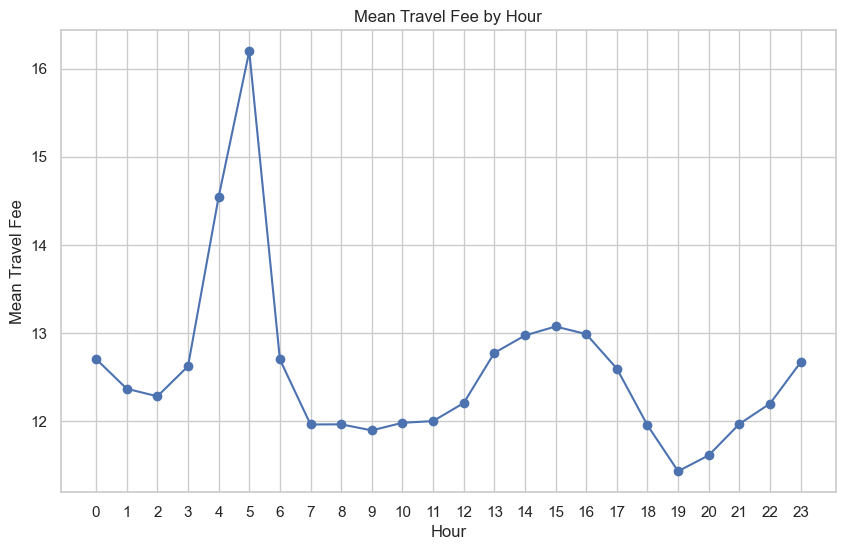

In [20]:
hourly_counts = train['hour'].value_counts().sort_index()
trips_hour_travelfee = train.groupby(['hour'])['travel_fee'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, trips_hour_travelfee.values, marker='o')

plt.xlabel('Hour')
plt.ylabel('Mean Travel Fee')
plt.title('Mean Travel Fee by Hour')
plt.xticks(range(24))  # Set x-axis ticks to represent each hour
# Show the plot
plt.show()

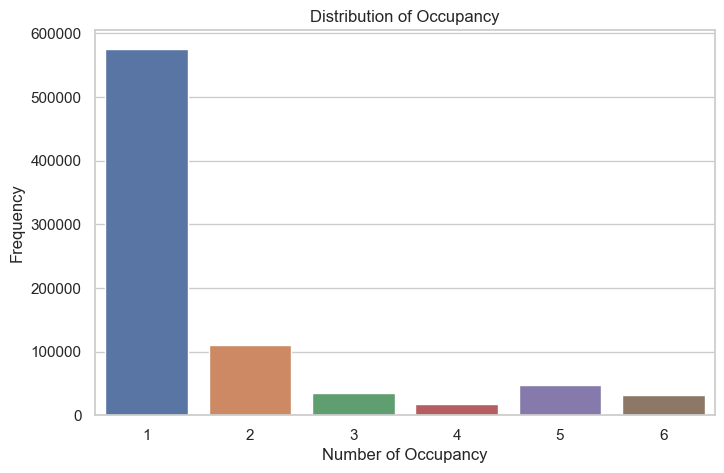

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=train["occupancy"].value_counts().index, y=train["occupancy"].value_counts().values)

plt.xlabel('Number of Occupancy')
plt.ylabel('Frequency')
plt.title('Distribution of Occupancy')

plt.show()

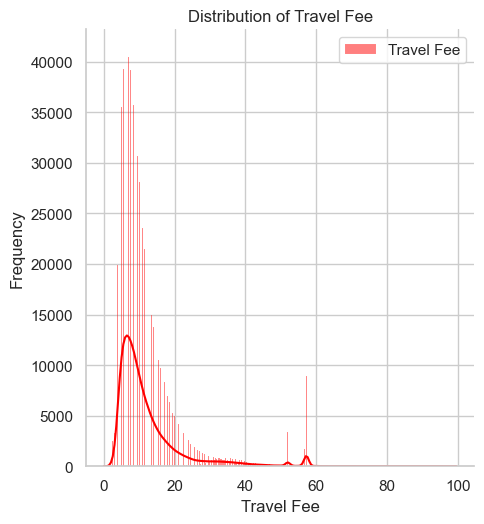

In [22]:
sns.displot(train['travel_fee'].values, color="red", label="Travel Fee", kde= True)
plt.title("Distribution of Travel Fee")
plt.xlabel("Travel Fee")
plt.ylabel("Frequency")

plt.legend()

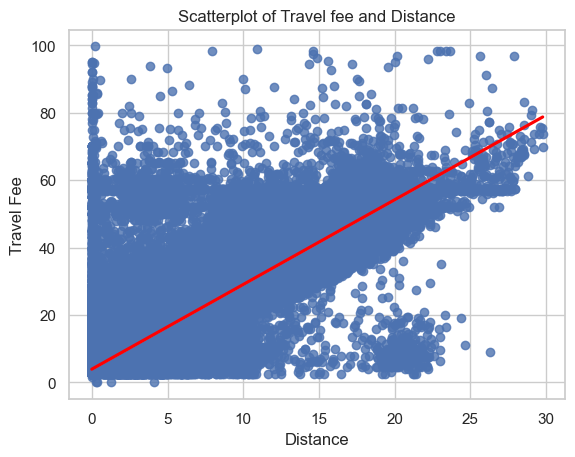

In [23]:
sns.regplot(x="distance", y="travel_fee", data=train, line_kws={"color": "red"})

plt.title("Scatterplot of Travel fee and Distance")
plt.xlabel("Distance")
plt.ylabel("Travel Fee")

plt.show()

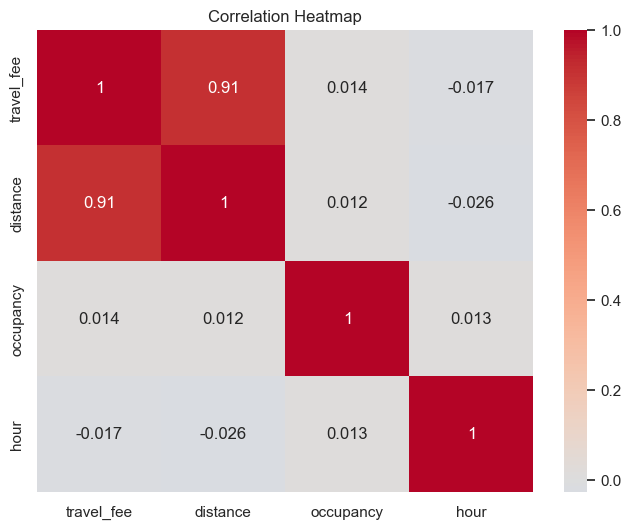

In [24]:
columns_to_include = ["travel_fee", "distance", "occupancy", "hour"]
correlation_matrix = train[columns_to_include].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()

In [25]:
taxi = train.drop("travel_fee", axis=1)
taxi_labels = train["travel_fee"].copy()

In [26]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818364 entries, 408561 to 121958
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   ID              818364 non-null  object             
 1   departure_time  818364 non-null  datetime64[ns, UTC]
 2   departure_long  818364 non-null  float64            
 3   departure_lat   818364 non-null  float64            
 4   arrival_long    818364 non-null  float64            
 5   arrival_lat     818364 non-null  float64            
 6   occupancy       818364 non-null  int64              
 7   distance        818364 non-null  float64            
 8   hour            818364 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(5), int32(1), int64(1), object(1)
memory usage: 59.3+ MB


In [27]:
taxi_labels.info()

<class 'pandas.core.series.Series'>
Index: 818364 entries, 408561 to 121958
Series name: travel_fee
Non-Null Count   Dtype  
--------------   -----  
818364 non-null  float64
dtypes: float64(1)
memory usage: 12.5 MB


In [28]:
num_attribs = ['occupancy', 'distance', 'hour']

In [29]:
num_pipeline = make_pipeline(StandardScaler())

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

# 5. Modelling

In [30]:
def evaluate(rmse,r2):
    print("Model Training Performance")
    print("---------------------------")
    print("Accuracy: ",(abs(r2.mean()*100)).round(2), "%")
    print("Average RMSE: ",abs(rmse.mean()))

## Lasso Regression

In [31]:
lasso_reg = make_pipeline(preprocessing, Lasso(alpha=0.01))

In [32]:
lasso_reg_rmse = -cross_val_score(lasso_reg, taxi, taxi_labels,
                               scoring="neg_root_mean_squared_error", cv=3)
lasso_reg_rmse

array([4.1426202 , 4.16071624, 4.1474682 ])

In [33]:
lasso_reg_r2 = -cross_val_score(lasso_reg, taxi, taxi_labels,
                               scoring="r2", cv=3)
lasso_reg_r2

array([-0.82251397, -0.82026252, -0.82255919])

In [34]:
evaluate(lasso_reg_rmse, lasso_reg_r2)

Model Training Performance
---------------------------
Accuracy:  82.18 %
Average RMSE:  4.15026821741982


## Ridge Regression

In [35]:
ridge_reg = make_pipeline(preprocessing, Ridge(alpha=0.01))

In [36]:
ridge_reg_rmse = -cross_val_score(ridge_reg, taxi, taxi_labels,
                               scoring="neg_root_mean_squared_error", cv=3)
ridge_reg_rmse

array([4.14262245, 4.16067237, 4.14740091])

In [37]:
ridge_reg_r2 = -cross_val_score(ridge_reg, taxi, taxi_labels,
                               scoring="r2", cv=3)
ridge_reg_r2

array([-0.82251378, -0.82026631, -0.82256495])

In [38]:
evaluate(ridge_reg_rmse, ridge_reg_r2)

Model Training Performance
---------------------------
Accuracy:  82.18 %
Average RMSE:  4.150231910973506


## Elastic Net Regression

In [39]:
enet_reg = make_pipeline(preprocessing, ElasticNet(alpha=0.01))

In [40]:
enet_reg_rmse = cross_val_score(enet_reg,
                              taxi, taxi_labels,
                              scoring="neg_root_mean_squared_error",
                              cv=10)
enet_reg_rmse

array([-4.20653156, -4.14617321, -4.11866888, -4.07912661, -4.20416816,
       -4.14678717, -4.14563951, -4.20182884, -4.18743596, -4.06615786])

In [41]:
enet_reg_r2 = cross_val_score(enet_reg,
                              taxi, taxi_labels,
                              scoring="r2",
                              cv=10)
enet_reg_r2

array([0.81674178, 0.82306819, 0.82280868, 0.82873122, 0.81875008,
       0.81888044, 0.82147781, 0.82038087, 0.81875472, 0.82797415])

In [42]:
evaluate(enet_reg_rmse, enet_reg_r2)

Model Training Performance
---------------------------
Accuracy:  82.18 %
Average RMSE:  4.150251776068108


## Decision Tree Regression

In [43]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

In [44]:
tree_reg_rmse = cross_val_score(tree_reg,
                              taxi, taxi_labels,
                              scoring="neg_root_mean_squared_error",
                              cv=10)

tree_reg_rmse

array([-5.51443684, -5.47894112, -5.50554752, -5.43550982, -5.49246537,
       -5.49931631, -5.50817454, -5.45768356, -5.50459675, -5.41297426])

In [45]:
tree_reg_r2 = cross_val_score(tree_reg,
                              taxi, taxi_labels,
                              scoring="r2",
                              cv=10)

tree_reg_r2

array([0.68506749, 0.69103854, 0.68338628, 0.69589441, 0.69064843,
       0.68146346, 0.68484476, 0.69696516, 0.68680029, 0.69514229])

In [46]:
evaluate(tree_reg_rmse, tree_reg_r2)

Model Training Performance
---------------------------
Accuracy:  68.91 %
Average RMSE:  5.480964609736008


## Random Forest Regression

In [47]:
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))

In [48]:
forest_reg_rmse = -cross_val_score(forest_reg, taxi, taxi_labels,
                                scoring="neg_root_mean_squared_error",
                                cv=3)
forest_reg_rmse

array([4.30889015, 4.34145585, 4.31280299])

In [49]:
forest_reg_r2 = -cross_val_score(forest_reg, taxi, taxi_labels,
                                scoring="r2",
                                cv=3)
forest_reg_r2

array([-0.80798075, -0.80430793, -0.8081302 ])

In [50]:
evaluate(forest_reg_rmse, forest_reg_r2)

Model Training Performance
---------------------------
Accuracy:  80.68 %
Average RMSE:  4.321049662031033


## KNN Regression

In [51]:
knn_reg = make_pipeline(preprocessing, neighbors.KNeighborsRegressor(n_neighbors = 10))

In [52]:
knn_reg_rmse = -cross_val_score(knn_reg, taxi, taxi_labels,
                                scoring="neg_root_mean_squared_error",
                                cv=3)
knn_reg_rmse

array([4.06159501, 4.08305186, 4.07548301])

In [53]:
knn_reg_r2 = -cross_val_score(knn_reg, taxi, taxi_labels,
                                scoring="r2",
                                cv=3)
knn_reg_r2

array([-0.82938895, -0.8269099 , -0.82866521])

In [54]:
evaluate(knn_reg_rmse, knn_reg_r2)

Model Training Performance
---------------------------
Accuracy:  82.83 %
Average RMSE:  4.073376627012515


## Light GBM Regression

In [55]:
lgb_model = LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100
)

lgb_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('lgbm', lgb_model)
])

In [56]:
lgb_reg_rmse = -cross_val_score(lgb_reg, taxi, taxi_labels,
                                scoring="neg_root_mean_squared_error",
                                cv=3)
lgb_reg_rmse

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 545576, number of used features: 3
[LightGBM] [Info] Start training from score 12.335992
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 545576, number of used features: 3
[LightGBM] [Info] Start training from score 12.330513
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

array([3.89378936, 3.91734645, 3.89813361])

In [57]:
lgb_reg_r2 = -cross_val_score(lgb_reg, taxi, taxi_labels,
                                scoring="r2",
                                cv=3)
lgb_reg_r2

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 545576, number of used features: 3
[LightGBM] [Info] Start training from score 12.335992
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 545576, number of used features: 3
[LightGBM] [Info] Start training from score 12.330513
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

array([-0.84319538, -0.84067409, -0.84325243])

In [58]:
evaluate(lgb_reg_rmse, lgb_reg_r2)

Model Training Performance
---------------------------
Accuracy:  84.24 %
Average RMSE:  3.90308980709614


## XGBoost Regression

In [59]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('xgb', xgb_model)
])

In [60]:
xgb_reg_rmse = -cross_val_score(xgb_reg, taxi, taxi_labels,
                                scoring="neg_root_mean_squared_error",
                               verbose=2,
                                cv=3)
xgb_reg_rmse

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[19:43:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .................................................... total time=  30.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.5s remaining:    0.0s


[19:43:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .................................................... total time=  30.5s
[19:44:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .................................................... total time=  30.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min finished


array([3.91274131, 3.92911963, 3.91318939])

In [61]:
xgb_reg_r2 = -cross_val_score(xgb_reg, taxi, taxi_labels,
                                scoring="r2",
                               verbose=2,
                                cv=3)
xgb_reg_r2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[19:44:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .................................................... total time=  31.0s
[19:45:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.1s remaining:    0.0s


[CV] END .................................................... total time=  30.5s
[19:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END .................................................... total time=  31.3s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished


array([-0.84166526, -0.83971498, -0.84203928])

In [62]:
evaluate(xgb_reg_rmse, xgb_reg_r2)

Model Training Performance
---------------------------
Accuracy:  84.11 %
Average RMSE:  3.9183501131914102


# 6. Fine Tune Shortlisted Model

## KNN Regression Tuning

In [63]:
param_grid = {
    'knn__n_neighbors': np.arange(1, 20),
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1, 2]
}

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('knn',  KNeighborsRegressor())
])

rnd_search_knn = RandomizedSearchCV(full_pipeline,
                                param_distributions=param_grid,
                                n_iter=5,
                                cv=3,
                                verbose=2,
                                scoring='neg_root_mean_squared_error',
                                random_state=42,
)

In [64]:
rnd_search_knn.fit(taxi, taxi_labels)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=1, knn__weights=uniform; total time=   6.5s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=1, knn__weights=uniform; total time=   6.4s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=8, knn__p=1, knn__weights=uniform; total time=   6.5s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=1, knn__p=2, knn__weights=uniform; total time=   5.7s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=1, knn__p=2, knn__weights=uniform; total time=   5.7s
[CV] END knn__algorithm=kd_tree, knn__n_neighbors=1, knn__p=2, knn__weights=uniform; total time=   5.8s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=9, knn__p=2, knn__weights=distance; total time=  19.0s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=9, knn__p=2, knn__weights=distance; total time=  19.5s
[CV] END knn__algorithm=ball_tree, knn__n_neighbors=9, knn__p=2, knn__weights=distance; total time=  1

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['occupancy',
                                                                                'distance',
                                                                                'hour'])])),
                                             ('knn', KNeighborsRegressor())]),
                   n_iter=5,
                   param_distributions={'knn__algorithm': ['auto', 'ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [65]:
final_model_knn = rnd_search_knn.best_estimator_

## Light GBM Regression Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
import lightgbm as lgbm

param_dist = {
    'lightgbm__n_estimators': [100, 200, 300],
    'lightgbm__learning_rate': [0.05, 0.1, 0.2],
    'lightgbm__num_leaves': [31, 50, 100],
    'lightgbm__max_depth': [5, 7, 9],
    'lightgbm__subsample': [0.8, 0.9, 1.0],
    'lightgbm__colsample_bytree': [0.8, 0.9, 1.0],
    'lightgbm__reg_alpha': [0.0, 0.1, 0.2],
    'lightgbm__reg_lambda': [0.0, 0.1, 0.2]
}

lgbm_reg = lgbm.LGBMRegressor(random_state=42)

# Create a full pipeline with preprocessing and LightGBM
full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('lightgbm', lgbm_reg)
])

# Create RandomizedSearchCV for LightGBM
rnd_search_lgbm = RandomizedSearchCV(full_pipeline,
                                param_distributions=param_dist,
                                n_iter=20,
                                cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42,
)

In [67]:
rnd_search_lgbm.fit(taxi, taxi_labels)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 545576, number of used features: 3
[LightGBM] [Info] Start training from score 12.335992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['occupancy',
                                                                                'distance',
                                                                                'hour'])])),
                                             ('lightgbm',
                                              LGBMRegressor(random_state=42))]),
                   n_iter=20,
                   param_distributions={'lightgbm__colsample_bytree': [0.8, 0.9,
                                                                       1.0],
                                        'lightgbm__learning_rate': [0.05, 0.1,
                                                                    0.2],
                                        'lightgbm__max_depth': [5, 7, 9],
                                        'lightgbm__n_estimators': [100, 200,
                                                                   300],
                                        'lightgbm__num_leaves': [31, 50, 100],
                                        'lightgbm__reg_alpha': [0.0, 0.1, 0.2],
                                        'lightgbm__reg_lambda': [0.0, 0.1, 0.2],
                                        'lightgbm__subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [68]:
final_model_lgbm = rnd_search_lgbm.best_estimator_

## Random Forest Regression Tuning

In [69]:
param_grid_forest = {
    'random_forest__n_estimators': [25, 50, 100, 150],
    'random_forest__max_features': randint(low=2, high=20),
    'random_forest__max_depth': [3, 6, 9],
    'random_forest__max_leaf_nodes': [3, 6, 9],
}

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state=42))
])

rnd_search_forest = RandomizedSearchCV(full_pipeline,
                                param_distributions=param_grid_forest,
                                n_iter=3,
                                cv=3,
                                verbose=2,
                                scoring='neg_root_mean_squared_error',
                                random_state=42,
)

In [70]:
rnd_search_forest.fit(taxi, taxi_labels)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END random_forest__max_depth=9, random_forest__max_features=16, random_forest__max_leaf_nodes=9, random_forest__n_estimators=150; total time= 1.2min
[CV] END random_forest__max_depth=9, random_forest__max_features=16, random_forest__max_leaf_nodes=9, random_forest__n_estimators=150; total time= 1.2min
[CV] END random_forest__max_depth=9, random_forest__max_features=16, random_forest__max_leaf_nodes=9, random_forest__n_estimators=150; total time= 1.2min
[CV] END random_forest__max_depth=3, random_forest__max_features=8, random_forest__max_leaf_nodes=6, random_forest__n_estimators=100; total time=  35.4s
[CV] END random_forest__max_depth=3, random_forest__max_features=8, random_forest__max_leaf_nodes=6, random_forest__n_estimators=100; total time=  35.8s
[CV] END random_forest__max_depth=3, random_forest__max_features=8, random_forest__max_leaf_nodes=6, random_forest__n_estimators=100; total time=  35.5s
[CV] END random_fore

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['occupancy',
                                                                                'distance',
                                                                                'hour'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=3,
                   param_distributions={'random_forest__max_depth': [3, 6, 9],
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026321B7E390>,
                                        'random_forest__max_leaf_nodes': [3, 6,
                                                                          9],
                                        'random_forest__n_estimators': [25, 50,
                                                                        100,
                                                                        150]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [71]:
final_model_forest = rnd_search_forest.best_estimator_

## Elastic Net Tuning

In [72]:
enet_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('elasticnet', ElasticNet())
])

param_dist = {
    'elasticnet__alpha': np.logspace(-4, 4, 100),
    'elasticnet__l1_ratio': np.linspace(0, 1, 100),
    'elasticnet__max_iter': np.arange(100, 1000, 100)
}

rnd_search_enet = RandomizedSearchCV(enet_reg,
                                     param_distributions=param_dist,
                                     n_iter=10,
                                     cv=5,
                                     verbose=2,
                                     scoring='neg_mean_squared_error',
                                     random_state=42
                                     )

In [73]:
rnd_search_enet.fit(taxi, taxi_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END elasticnet__alpha=0.002364489412645407, elasticnet__l1_ratio=0.5555555555555556, elasticnet__max_iter=100; total time=   0.1s
[CV] END elasticnet__alpha=0.002364489412645407, elasticnet__l1_ratio=0.5555555555555556, elasticnet__max_iter=100; total time=   0.1s
[CV] END elasticnet__alpha=0.002364489412645407, elasticnet__l1_ratio=0.5555555555555556, elasticnet__max_iter=100; total time=   0.1s
[CV] END elasticnet__alpha=0.002364489412645407, elasticnet__l1_ratio=0.5555555555555556, elasticnet__max_iter=100; total time=   0.0s
[CV] END elasticnet__alpha=0.002364489412645407, elasticnet__l1_ratio=0.5555555555555556, elasticnet__max_iter=100; total time=   0.0s
[CV] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.9595959595959597, elasticnet__max_iter=600; total time=   0.0s
[CV] END elasticnet__alpha=0.0001, elasticnet__l1_ratio=0.9595959595959597, elasticnet__max_iter=600; total time=   0.0s
[CV] END elasticnet__a

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['occupancy',
                                                                                'distance',
                                                                                'hour'])])),
                                             ('elasticnet', ElasticNet())]),
                   param_distributions={'elasticnet__alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2...
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]),
                                        'elasticnet__max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
final_model_enet = rnd_search_enet.best_estimator_

## XGBoost Regression Tuning

In [75]:
xgb_model = xgb.XGBRegressor()

params = {
    "xgb__colsample_bytree": uniform(0.7, 0.3),
    "xgb__gamma": uniform(0, 0.5),
    "xgb__learning_rate": uniform(0.03, 0.3),
    "xgb__max_depth": randint(2, 6),
    "xgb__n_estimators": randint(100, 150),
    "xgb__subsample": uniform(0.6, 0.4)
}

xgb_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('xgb', xgb_model)
])

rnd_search_xgb = RandomizedSearchCV(xgb_reg,
                            param_distributions=params,
                            random_state=42,
                            n_iter=10,
                            cv=3,
                            verbose=2,
                            n_jobs=1,
                            return_train_score=True)


In [76]:
rnd_search_xgb.fit(taxi, taxi_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END xgb__colsample_bytree=0.8123620356542087, xgb__gamma=0.4753571532049581, xgb__learning_rate=0.24959818254342153, xgb__max_depth=2, xgb__n_estimators=120, xgb__subsample=0.6624074561769746; total time=  10.8s
[CV] END xgb__colsample_bytree=0.8123620356542087, xgb__gamma=0.4753571532049581, xgb__learning_rate=0.24959818254342153, xgb__max_depth=2, xgb__n_estimators=120, xgb__subsample=0.6624074561769746; total time=  11.0s
[CV] END xgb__colsample_bytree=0.8123620356542087, xgb__gamma=0.4753571532049581, xgb__learning_rate=0.24959818254342153, xgb__max_depth=2, xgb__n_estimators=120, xgb__subsample=0.6624074561769746; total time=  11.0s
[CV] END xgb__colsample_bytree=0.7467983561008608, xgb__gamma=0.02904180608409973, xgb__learning_rate=0.28985284373248055, xgb__max_depth=5, xgb__n_estimators=139, xgb__subsample=0.8832290311184181; total time=  29.6s
[CV] END xgb__colsample_bytree=0.7467983561008608, xgb__gamma=0.029041

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['occupancy',
                                                                                'distance',
                                                                                'hour'])])),
                                             ('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=N...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026321C03890>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026321BE6E50>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026321BE51D0>},
                   random_state=42, return_train_score=True, verbose=2)

In [77]:
final_model_xgb = rnd_search_xgb.best_estimator_

# 7. Evaluation

In [78]:
def evaluate_test_set(model):
    final_predictions = model.predict(X_test)
    final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
    final_r2 = r2_score(y_test, final_predictions)

    print("Model Validation Performance")
    print("---------------------------")
    print("Accuracy: ", (final_r2*100).round(2), "%")
    print("Average RMSE: ",abs(final_rmse))

In [79]:
test = test.dropna(axis=0)

test['departure_time'] = pd.to_datetime(test['departure_time'])
test['hour'] = test['departure_time'].dt.hour

Drop missing value and create 'hour' feature for test set

In [80]:
longitude_range = (-74.05, -73.75)
latitude_range = (40.6, 40.90)

departure_longitude_condition = (test['departure_long'] >= longitude_range[0]) & (test['departure_long'] <= longitude_range[1])
departure_latitude_condition = (test['departure_lat'] >= latitude_range[0]) & (test['departure_lat'] <= latitude_range[1])
test = test[departure_longitude_condition & departure_latitude_condition]

arrival_longitude_condition = (test['arrival_long'] >= longitude_range[0]) & (test['arrival_long'] <= longitude_range[1])
arrival_latitude_condition = (test['arrival_lat'] >= latitude_range[0]) & (test['arrival_lat'] <= latitude_range[1])
test = test[arrival_longitude_condition & arrival_latitude_condition]

Remove outlier for test set so that 'distance' feature can be calculated

In [81]:
X_test = test.drop("travel_fee", axis=1)
y_test = test["travel_fee"].copy()

In [82]:
for index, row in X_test.iterrows():
    departure_coords = (row["departure_lat"], row["departure_long"])
    arrival_coords = (row["arrival_lat"], row["arrival_long"])
    distance = mpu.haversine_distance(departure_coords, arrival_coords)
    X_test.loc[index, "distance"] = distance

Create 'distance' feature for test set

Light GBM Regression Evaluation

In [83]:
evaluate_test_set(final_model_lgbm)

Model Validation Performance
---------------------------
Accuracy:  82.73 %
Average RMSE:  4.137990104962491


KNN Regression Evaluation

In [84]:
evaluate_test_set(final_model_knn)

Model Validation Performance
---------------------------
Accuracy:  81.91 %
Average RMSE:  4.234727031345752


Elastic Net Regression Evaluation

In [85]:
evaluate_test_set(final_model_enet)

Model Validation Performance
---------------------------
Accuracy:  80.59 %
Average RMSE:  4.386367381535792


 Random Forest Regression Evaluation

In [86]:
evaluate_test_set(final_model_forest)

Model Validation Performance
---------------------------
Accuracy:  80.45 %
Average RMSE:  4.402288089012495


XGBoost Regression Evaluation

In [87]:
evaluate_test_set(final_model_xgb)

Model Validation Performance
---------------------------
Accuracy:  82.84 %
Average RMSE:  4.124845182989327


### XGBoost Regression has the highest accuracy and lowest RMSE